In [15]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()


In [16]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
train_scaled.shape

(48000, 28, 28)

In [10]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100,activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model
                                 

In [11]:
model = model_fn()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [21]:
print(history.history.keys())
history.history

dict_keys(['loss', 'accuracy'])


{'loss': [0.5354381799697876,
  0.39384716749191284,
  0.35666975378990173,
  0.3323409855365753,
  0.3166879713535309],
 'accuracy': [0.8112083077430725,
  0.8583750128746033,
  0.8733958601951599,
  0.8814166784286499,
  0.8864374756813049]}

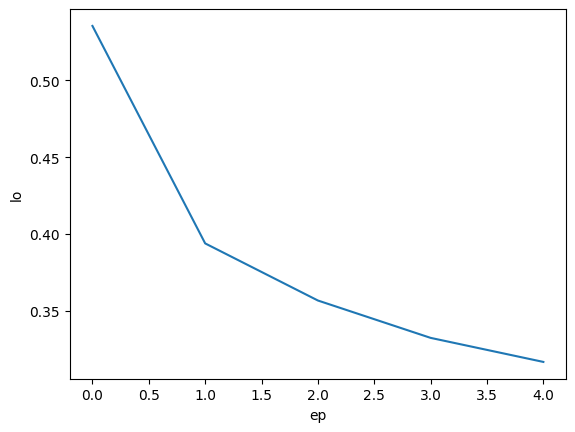

In [22]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.xlabel('ep')
plt.ylabel('lo')
plt.show()

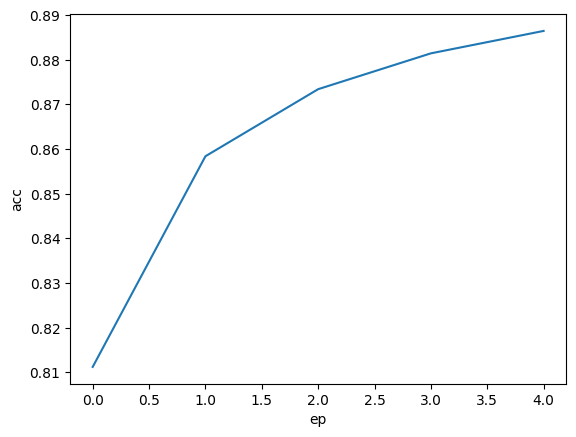

In [23]:
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.xlabel('ep')
plt.ylabel('acc')
plt.show()

In [24]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0)


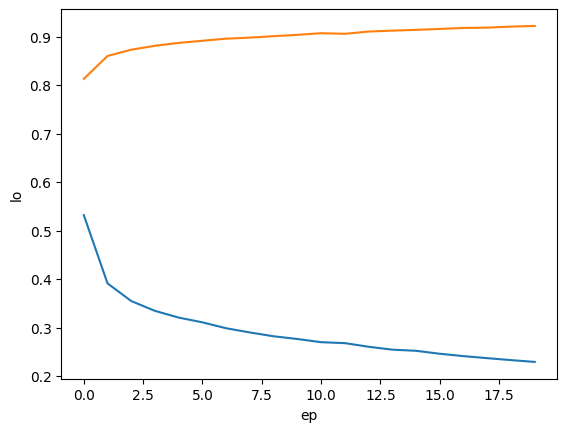

In [26]:

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('ep')
plt.ylabel('lo')
plt.show()

In [27]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))


In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

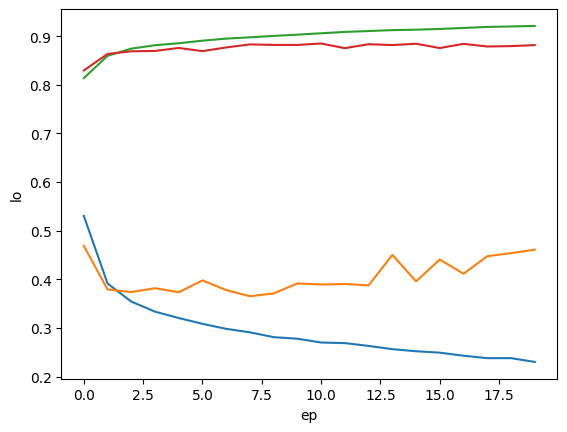

In [29]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('ep')
plt.ylabel('lo')
plt.show()

In [33]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))


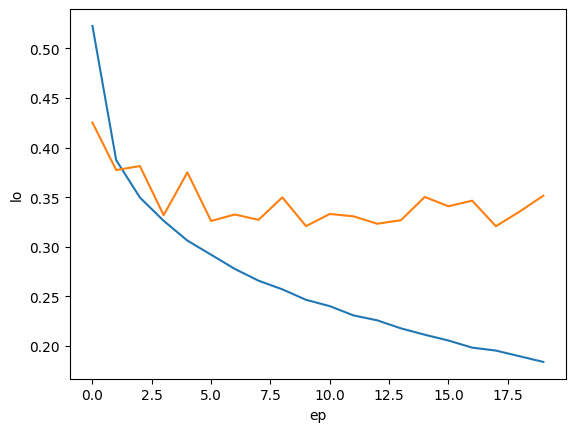

In [35]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.xlabel('ep')
plt.ylabel('lo')
plt.show()

In [36]:
model=model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))


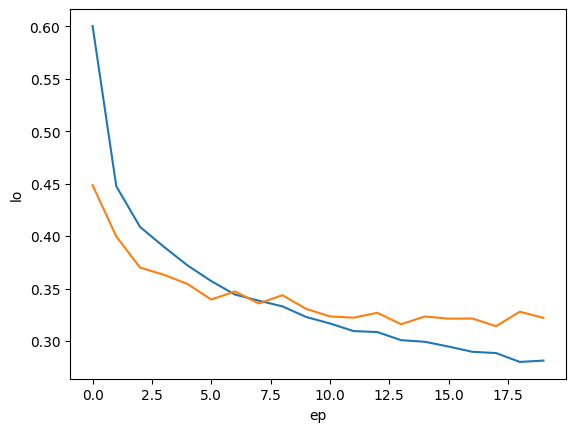

In [38]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('ep')
plt.ylabel('lo')
plt.show()

In [39]:
model=model_fn(keras.layers.Dropout(0.3))
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.save_weights('model-weights.h5')

In [42]:
model.save('model-whole.keras')

In [45]:
!ls -al *.h5
!ls -al *.keras

-rw-r--r--  1 lotco  staff  333320  7 31 06:53 model-weights.h5
-rw-r--r--  1 lotco  staff  982480  7 31 06:54 model-whole.h5
-rw-r--r--  1 lotco  staff  338205  7 31 06:54 model-whole.keras


In [46]:
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [47]:
import numpy as np
val_labels=np.argmax(model.predict(val_scaled),axis=-1)
np.mean(val_labels==val_target)

375/375 [==============================] - 0s 313us/step


0.8843333333333333

In [49]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 357us/step - loss: 0.3278 - accuracy: 0.8843


[0.3278080224990845, 0.8843333125114441]

In [50]:
model=model_fn(keras.layers.Dropout(0.3))
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/Users/lotco/miniforge3/envs/311/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [51]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 348us/step - loss: 0.3270 - accuracy: 0.8863


[0.32699185609817505, 0.8862500190734863]

In [52]:
model=model_fn(keras.layers.Dropout(0.3))
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 100)               78500     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_24 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/Users/lotco/miniforge3/envs/311/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
early_stopping_cb.stopped_epoch

11